In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

import sys
from pathlib import Path
parent_dir = Path.cwd().parent.parent

if str(parent_dir) not in sys.path:
    sys.path.append(str(parent_dir))

from src.data.data_extraction import TimeSeriesDataset

In [ ]:
time_series = TimeSeriesDataset(parent_dir / r'data/penguin_count.csv', 'nightly_crossing_number', technique='diff', lookback=200)

X,y = time_series.load_dataset()



In [ ]:
""" 
Anomaly Detection
Based on: https://iopscience.iop.orx1g/article/10.1088/1742-6596/1061/1/012012

Approach: Model-based
- Model: LSTM
- Methodology: 
    Differenciate the time series to make it stationary. 
    Predict the differenciated time series.
    Establish a threshold for the anomaly classification.
"""



train = int(len(X)*0.75)
val = int(len(X)*0.90)

X_train, X_val, X_test = X[:train], X[train:val], X[val:]
y_train, y_val, y_test = y[:train], y[train:val], y[val:]

# --------- scaling the input data -------
scaler = MinMaxScaler((-0.9,0.9))
scaler.fit(X_train)
scaler.transform

# -------- Creating model -----------

# model = Sequential()
# model.add(LSTM(5, input_shape=(lookback, 1)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mean_squared_error')

# # --------- fitting model ------------
# history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=1)


# # --------- Testing Model ------------
# model.summary()

MinMaxScaler(feature_range=(-0.9, 0.9))

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


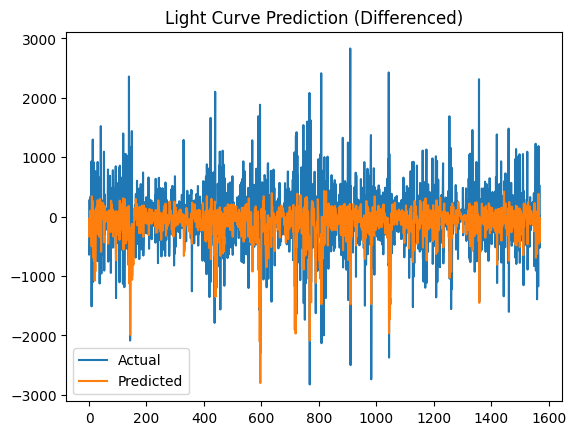

In [66]:
import matplotlib.pyplot as plt

predictions = model.predict(X_test)

# 9. Inverse transform to original scale
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1,1))

# 10. Plot predictions
plt.plot(y_test_inv, label='Actual')
plt.plot(predictions_inv, label='Predicted')
plt.title("Light Curve Prediction (Differenced)")
plt.legend()
plt.show()